# Happiness <a id='happiness'></a>

## 1. Data Description

### Dataset size: 
- There are 11 columns and 2199 rows.

In [8]:
## load the dataset
import pandas as pd
df = pd.read_excel('DataForTable2.1WHR2023.xls')
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


### Features
- There are 11 features (columns). They are "country name", "year", "Life ladder" measuring the happiness score from 0 (least happy) to 10(happiest), "Log GDP per capita", "social support" measuring having someone to count on in times of trouble, "healthy life expectancy at brith", "freedom to make life choices", "generosity" measuring whether people donated money to a charity in the past month or not, "Perceptions of corruption", positive affect measuring the average of three positive affect in laugh, enjoyment and doing interesting things, and "Negative affect" measuring the average of three negative affect in worry, sadness and anger. 
- Among them, "Country name" is represented as an object, "year" is represented as a integer, and all other features are represented as floats. 

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


### Correlation:
- I replaced all missing values with the mode of the column so that the correlation is not affected.
- One interesting correlation I found is that the correlation between "life ladder" and "generosity" is only 0.15, which indicates that when people become richer, they won't be more generous.

In [12]:
# Calculate the mode of each column
modes = df.mode().iloc[0]

# Fill missing values with the mode of each column
df_filled = df.fillna(modes)

<Axes: >

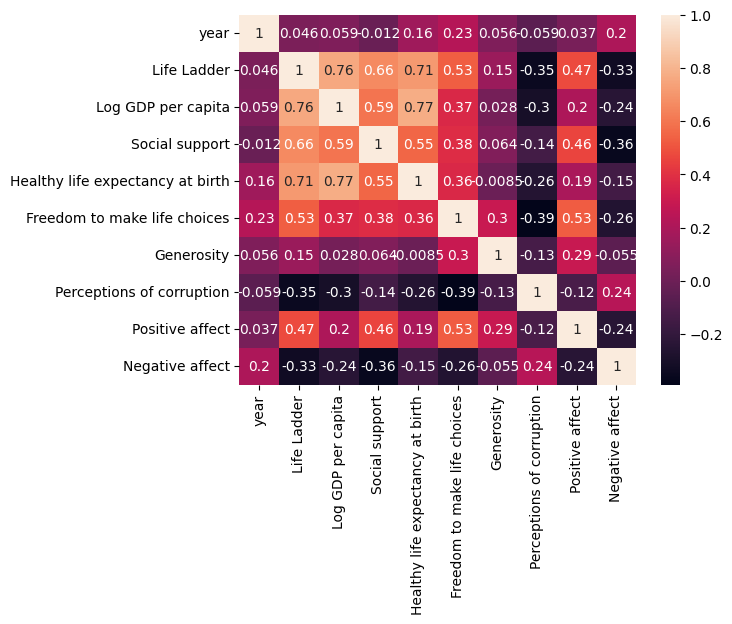

In [10]:
import seaborn as sns
df_corr = df_filled.drop(columns=['Country name'], inplace=True)
sns.heatmap(df_filled.corr(), annot=True)

### Distribution
- The year distribution is interesting to me because I am expecting that the number of data to increase when year increases but it's actually not.

In [17]:
df['year'].value_counts()

year
2017    147
2011    146
2014    144
2019    143
2015    142
2012    141
2016    141
2018    141
2013    136
2010    124
2021    122
2020    116
2009    114
2022    114
2008    110
2007    102
2006     89
2005     27
Name: count, dtype: int64

## 2. Data Quality Evaluation

### Missing values:
- The column with most missing values is "Perceptions of corruption", which is around 5% of the total number of rows.
- For other columns that contains missing values, the number of missing values is no greater than 3.5%, which is acceptable.

In [75]:
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64

### Data Limitation:
- The earliest year when a country reports its happiness score is 2005. We don't have any data before that.

### Overall Data Evaluation:
- I think overall the data quality is good because there isn't much missing value and all data is not distortioned.

In [151]:
df.loc[df['year'].idxmin()]

Country name                        Australia
year                                     2005
Life Ladder                          7.340688
Log GDP per capita                  10.662058
Social support                       0.967892
Healthy life expectancy at birth    69.800003
Freedom to make life choices         0.934973
Generosity                                NaN
Perceptions of corruption            0.390416
Positive affect                       0.76977
Negative affect                      0.238012
Name: 76, dtype: object

## 3. Dataset Analysis <a id='data-analysis'></a>

#### Question 2: What is the happiest country in 2022? In 2013? Of all time? What is the least happy country in 2022, 2013 and of all time?#

##### Based on the Statistical Appendix of World Happiness Report, the metric of happiness is named "life ladder" in our dataset. For a single year like 2022, I will just refer to the life ladder value. For all time, I will calculate the average of life ladder values of all years.

In [146]:
# life ladder of each country in 2022 in descending order
df_2022 = df[df['year'] == 2022][['Country name', 'Life Ladder']]
happy_df_2022 = df_2022.sort_values(by = 'Life Ladder', ascending = False)
happy_df_2022

,Country name,Life Ladder
637,Finland,7.728998
925,Israel,7.662397
521,Denmark,7.544965
830,Iceland,7.448794
1865,Sweden,7.431214
...,...,...
2198,Zimbabwe,3.296220
442,Congo (Kinshasa),3.207197
1709,Sierra Leone,2.560430
1117,Lebanon,2.352428


In [132]:
# the happiest country in 2022
happy_df_2022.loc[happy_df_2022['Life Ladder'].idxmax()]

Country name     Finland
Life Ladder     7.728998
Name: 637, dtype: object

In [135]:
# the least happy country in 2022
happy_df_2022.loc[happy_df_2022['Life Ladder'].idxmin()]

Country name    Afghanistan
Life Ladder        1.281271
Name: 13, dtype: object

In [147]:
# life ladder of each country in 2013 in descending order
df_2013 = df[df['year'] == 2013][['Country name', 'Life Ladder']]
happy_df_2013 = df_2013.sort_values(by = 'Life Ladder', ascending = False)
happy_df_2013

,Country name,Life Ladder
334,Canada,7.593794
512,Denmark,7.588607
823,Iceland,7.501394
97,Austria,7.498803
628,Finland,7.444636
...,...,...
356,Chad,3.507663
185,Benin,3.479413
1641,Rwanda,3.466388
279,Burkina Faso,3.325950


In [134]:
# the happiest country in 2013
happy_df_2013.loc[happy_df_2013['Life Ladder'].idxmax()]

Country name      Canada
Life Ladder     7.593794
Name: 334, dtype: object

In [136]:
# the least happy country in 2013
happy_df_2013.loc[happy_df_2013['Life Ladder'].idxmin()]

Country name       Syria
Life Ladder     2.687553
Name: 1883, dtype: object

In [143]:
# life ladder of each country of all time in descending order
df_all_time = df.groupby('Country name')['Life Ladder'].mean().to_frame()
happy_df_all_time = df_all_time.sort_values(by = 'Life Ladder', ascending = False)
happy_df_all_time

,Life Ladder
Country name,
Denmark,7.673428
Finland,7.619146
Norway,7.481820
Switzerland,7.474483
Iceland,7.458607
...,...
Rwanda,3.654473
Burundi,3.548124
Central African Republic,3.514954


In [144]:
# the happiest country of all time
happy_df_all_time.loc[happy_df_all_time['Life Ladder'].idxmax()]

Life Ladder    7.673428
Name: Denmark, dtype: float64

In [145]:
# the least happy country of all time
happy_df_all_time.loc[happy_df_all_time['Life Ladder'].idxmin()]

Life Ladder    3.346632
Name: Afghanistan, dtype: float64

##### Conclusion: The happiest country is Finland in 2022, Canada in 2013, and Denmark of all time. The least happy country is Afghanistan in 2022, Syria in 2013, and Afghanistan of all time.

#### Question 3: Of the countries in this dataset, which country had the largest increase in happiness from its start of participation to 2023? Which had the largest decrease in happiness?

In [107]:
# Calculate happiness increasement value from its start of participation to 2022 of each country
happy_increment = []

for name, group in df.groupby('Country name'):
    existed2023 = len(group.query('year == 2022'))
    
    if existed2023 == 0:
        happy_increment.append(0)
        continue

    group = group.reset_index()
    happy = group.iloc[-1, 3] - group.iloc[0, 3]
    happy_increment.append(happy)
    
country_col = df.groupby('Country name').mean().reset_index()['Country name']

In [148]:
# Create a new dataset of by sorting happiness increment value in descending order
happy_df = pd.DataFrame(
    {'country': country_col,
     'happiness_increment': happy_increment})
happy_sorted_df = happy_df.sort_values(by='happiness_increment', ascending = False)
happy_sorted_df

,country,happiness_increment
32,Congo (Brazzaville),1.985126
107,Nicaragua,1.932099
52,Georgia,1.617647
20,Bulgaria,1.534551
115,Paraguay,1.407530
...,...,...
18,Botswana,-1.304092
64,India,-1.418443
74,Jordan,-1.939054
0,Afghanistan,-2.442319


In [120]:
## Find the country with the largest increase in happiness
happy_df.loc[happy_df['happiness_increment'].idxmax()]

country                Congo (Brazzaville)
happiness_increment               1.985126
Name: 32, dtype: object

In [121]:
## Find the country with the largest decrease in happiness
happy_df.loc[happy_df['happiness_increment'].idxmin()]

country                 Lebanon
happiness_increment   -3.138818
Name: 82, dtype: object

##### Conclusion: Of the countries in this dataset, Congo had the largest increase in happiness from its start of participation to 2022, and Lebanon had the largest decrease in happiness.